In [1]:
#Loading Required Libraries 
import anndata
import scipy as sp
import geopandas
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import pandas as pd
from libpysal.weights import Queen, Rook, KNN
from esda.moran import Moran
from splot.esda import plot_moran
from esda.moran import Moran_Local
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
multidim_df = pd.read_csv('multidim_df.csv')
scalar_df = pd.read_csv('scalar_df.csv')

In [3]:
gdf = geopandas.read_file('~/voronoi_regions/voronoi_regions.shp')

In [4]:
gdf['area'] = scalar_df.iloc[0,1:].values

<AxesSubplot:>

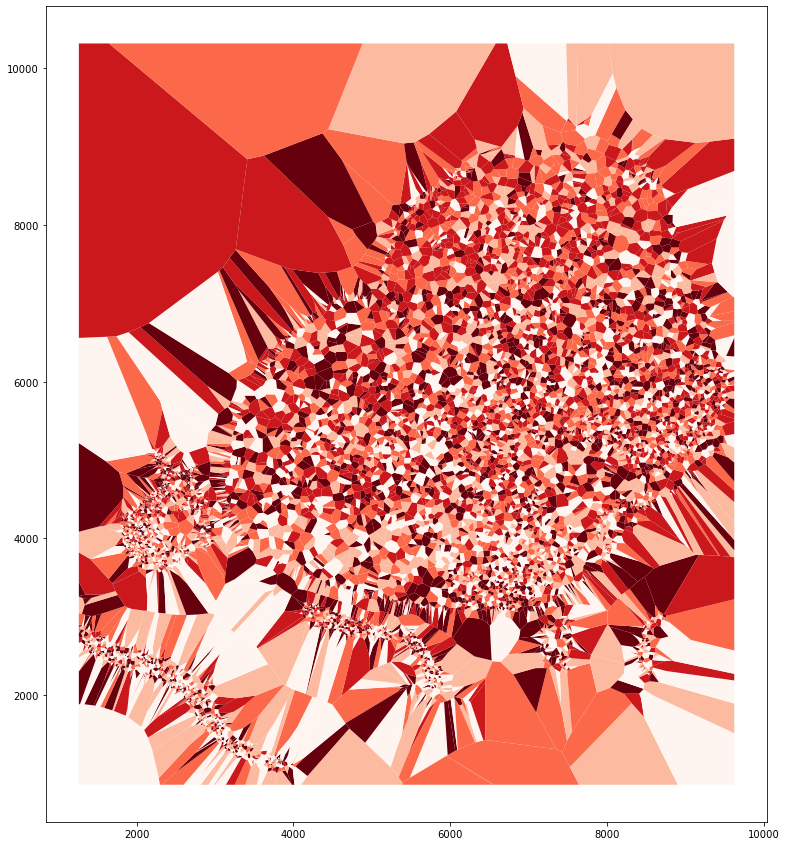

In [5]:
gdf.plot(column = 'area', aspect = 'equal', cmap = 'Reds', k=5,
          lw=0.7, scheme='quantiles', figsize=(15, 15))

In [6]:
#WEIGHTS MATRIX
w_knn = KNN.from_dataframe(gdf, k=20)

/tmp/ipykernel_401440/1949216767.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ar = gdf.area


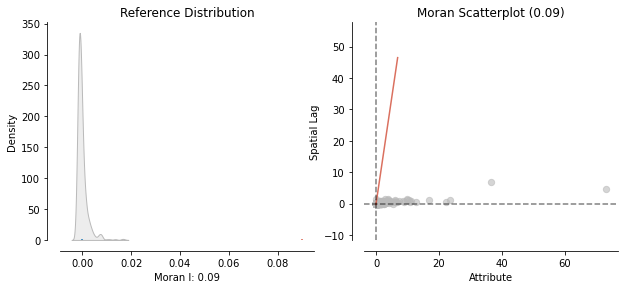

In [7]:
ar = gdf.area
moran = Moran(ar, w_knn)
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [8]:
gdf = gdf.astype({"area": "float"})

In [9]:
####### LOCAL SPATIAL AUTOCORRELATION #######

In [10]:
moran_loc = Moran_Local(gdf['area'], w_knn)

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

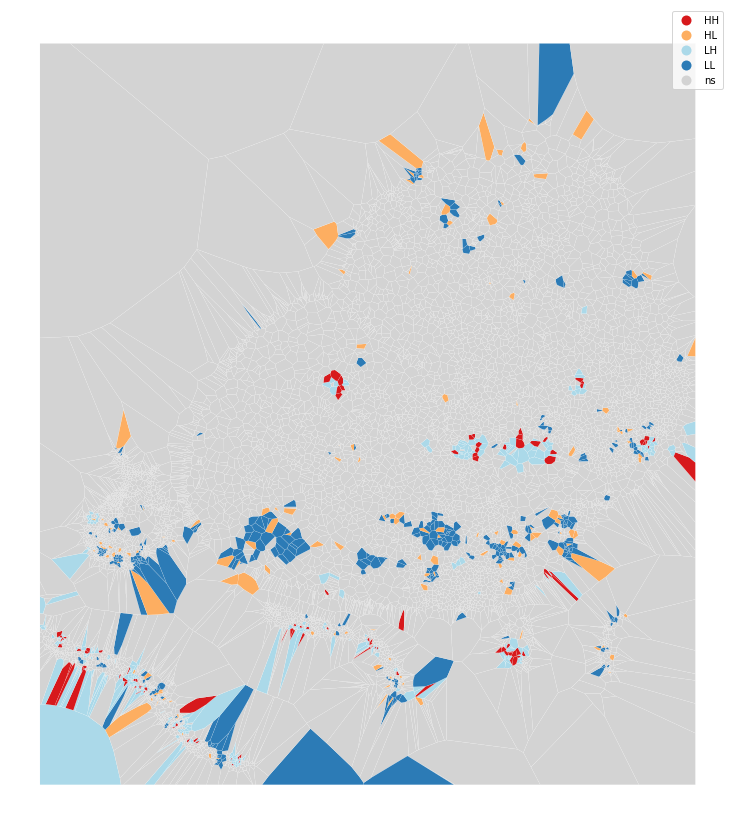

In [11]:
lisa_cluster(moran_loc, gdf, aspect = 'equal',figsize=(15, 15))